# Village consumption smoothing 

A simple simulation of a village sharing economy.  We simulate $T$ periods of income for $N$ individuals.  Each individual receives a base level of income plus an stochastic income component.  The income shocks can be independent or correlated.  

We plot income in each household with and without consumption smoothing. Further below we relate this simulation to empirical investigations of consumption smoothing in Nigeria by Udry (1994) and Townsend (1994).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider

#### Default parameters

In [2]:
rho = 0   
N = 5
T = 15
V = 2

If there are $N=5$ households they have base income of $[10, 15, 20, 25, 30]$, respectively.  To this base income we add a mean zero normally distributed shock with with covariance  $\rho$

In [3]:
def shocks(rho=0, N=N, T=T):
    '''Returns an N by T matrix of multivariate normally distributed shocks with correlation rho'''
    mean = np.zeros(N)
    cov = np.ones((N, N), int)*rho*V
    np.fill_diagonal(cov, V)
    #print(cov)
    e = np.random.multivariate_normal(mean, cov, size=T)
    return e

In [4]:
def incomes(rho=0, V=V, N = N, T=T):
    '''Generates random incomes for N over T periods'''
    t = np.arange(T)   # time periods
    x0 = np.arange(10,10+N*5,5)   # average income
    e = shocks(rho=rho, N=N, T=T)*V
    X = x0 + e
    
    XT = np.sum(X, axis = 1)
    
    w = x0/np.sum(x0)
    XS = np.array([XT * wt for wt in w]).T
    
    return t, X, XS

In [5]:
def plot_cons(rho=0, V=1):
    #print('rho = {}'.format(rho))
    t, X, XS = incomes(rho=rho, V=V, N=N, T=T)
    fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(t, X,'x-')
    ax.plot(t,XS,linestyle='dashed')
    ax.set_xlabel('time')
    ax.set_xticks(np.arange(T, step=1))
    fig.suptitle(r'$\rho = {:0.2f}$'.format(rho))
    ax.grid()
    plt.tight_layout();

## Examples 

We illustrate with three different scenarios.  Remember that these are random draws so will be different everytime these are run.

### independent incomes

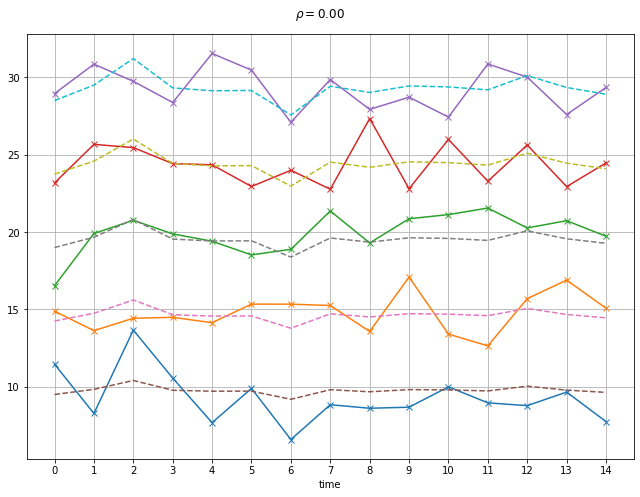

In [6]:
plot_cons(rho=0, V=1)

### Correlated incomes

When incomes are correlated, village incomes tend to move up or down together so there is Less opportunity for risk sharing. Consumption will tend to follow income more closely.

The village as a whole would benefit from the intermediation of outsiders.

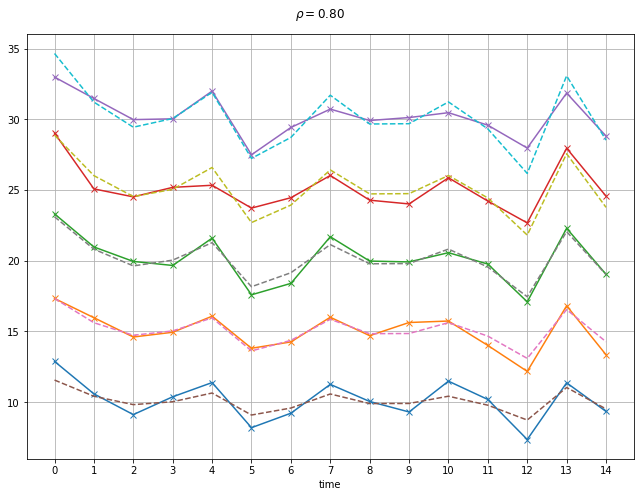

In [7]:
plot_cons(rho=0.8, V=1)

### Negatively correlated incomes

With negative correlation across households, consumption smoothing possibilities increase. 

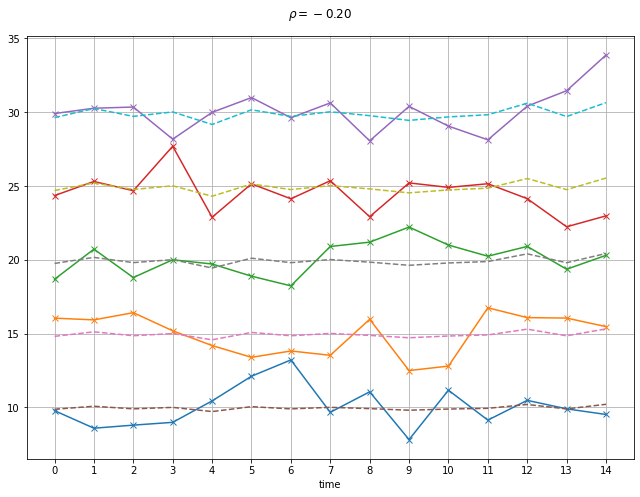

In [8]:
plot_cons(rho=-0.2, V=1)

## Testing for Consumption Smoothing

### The Planner's Problem

$$
\max_{c_{it}(s^t)} \sum_{i} \lambda_i \sum_{t=1}^{\infty}\sum_{s^t} \delta^t \pi(s^t)u_i(c_{it}(s^t))
$$

$\lambda_{i}$ are Pareto weights of household $i$ in the social planners objective

$\pi(s^t)$ is the probability of history $s^t$ occurring 
$$
\sum\limits_i {c_{it} (s^t)} \le \sum\limits_i {y_{it} (s_t),} \,\,\,\,\,\forall s^t,\forall t,
$$


Let's simplify to a single period. For any two individuals  $i$ and $\upsilon$ an efficient allocation requires:
$$
{\lambda_\upsilon \cdot u^{\prime}_\upsilon (c_{\upsilon s} )}={\lambda_i \cdot u^{\prime}_i (c_{is})},\,\,\,\,\forall s
$$
In words, the weighted marginal utilities of consumption are equalized across individuals in every state. 


#### CRRA Example:

Let's assume utility of CRRA form: $u(c_{is})=ln(c_{is})$ 

Stochastic income is generated as: $y_{is}= \bar y_i +\mu_{is}$    with  $\mu_{is} \sim \mathcal{N}(0,\Sigma)$

Let's also assume Pareto welfare weights proportional to person's share of expected income:  

$$
\lambda_i =\frac{\bar y_i}{\bar Y} \ \ \ \text{   where } \ \ \ \bar Y = \sum \bar y_j
$$

Efficient consumption pooling insures individual against idiosyncratic shocks, but not aggregate shocks.  

$$
c_{is}=\lambda_i \cdot  Y_s
$$  

**Efficient consumption smoothing test:** own consumption should depend on aggregate village income and on not idiosyncratic income.  Same result holds for other utility functions.

That means that if we run a FE regression of consumption on own and village aggregate income:

$$
c_{is}=\beta_0 + \beta_1 y_{is} + \beta_2  \cdot  Y_s + e_{i} + \epsilon_{is}
$$  

Under consumption smoothing, we should expect $\beta_1=0$ and $\beta_2 >0$


Two important papers that employ this approach are:

>Udry, C., 1994. Risk and insurance in a rural credit market: An empirical investigation in northern Nigeria. _The Review of Economic Studies_ 61, 495–526.

>Townsend, R.M., 1994. Risk and Insurance in Village India. _Econometrica_ 62, 539–91.


The figure below, taken from Townsend (1994) shows the comovement of household incomes (as a deviation from village average) for ten households in the Indian village of Aurepalle.  Similar to the simulated data above, we can observe that households are exposed to significant ideosyncratic income shocks.

![incomecomovement](../media/Townsend_risk2.png)


Households in this village do however appear to be able to smooth consumption streams considerably, via some combination of own saving/dissaving, financial contracting with other households and other means. The next figure shows the comovement of household consumptions (focused on grain only)

![](../media/Townsend_risk3.png)
